In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [3]:
import os

In [4]:
path = 'data/fraude/'

In [5]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [6]:
pd.set_option('display.max_columns',200)

In [7]:
import random
valor_particion = 0.75
valor_s = 900907
random.seed(valor_s)
np.random.seed(valor_s)
semilla = valor_s

# Lectura de datos

In [8]:
df = pd.read_csv( os.path.join( path , 'fraudTrain.csv' ) )

In [9]:
df.shape

(1296675, 23)

In [10]:
df.sample(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1208784,1208784,2020-05-19 23:19:13,343668971234893,"fraud_Lang, Towne and Schuppe",kids_pets,100.7200,Sally,Moore,F,835 Reese Views Suite 884,Hopkins,SC,29061,33.9349,-80.8449,13717,Chiropodist,1949-11-16,22f22463af58d8e98736ea3bf2694c93,1369005553,34.7048,-80.2002,0
15839,15839,2019-01-10 07:15:03,30175986190993,fraud_Durgan-Auer,misc_net,387.2800,Rebecca,Butler,F,0665 Lisa Alley,Winger,MN,56592,47.5375,-95.9941,516,Applications developer,1966-06-07,05d55424725f496397262acec0358194,1326179703,46.8002,-95.1513,0
238662,238662,2019-04-29 16:23:56,503848303379,"fraud_Hagenes, Hermann and Stroman",travel,1960.2900,Gregory,Wallace,M,27203 Darrell Landing,Saint James City,FL,33956,26.5290,-82.0916,3776,Sport and exercise psychologist,1976-09-12,bedd8abe59ac2b41f82cd01fe89a7039,1335716636,25.9358,-81.2570,0
350400,350400,2019-06-13 18:35:45,4980323467523543940,"fraud_Schumm, McLaughlin and Carter",food_dining,18.8800,Patrick,Massey,M,7812 Shane Shoals Apt. 607,North Haverhill,NH,3774,44.0978,-72.0191,1966,Structural engineer,1947-10-27,b00ce6159662495b931cd02fcadbbe1c,1339612545,44.8906,-72.0437,0
1141855,1141855,2020-04-20 19:42:29,2720012583106919,fraud_Wuckert-Goldner,home,78.1400,Joseph,Murray,M,42933 Ryan Underpass,Manderson,SD,57756,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,4d4b440b2a3e0a1b7d07e62a8a4ea787,1366486949,44.1073,-102.2620,0
412499,412499,2019-07-06 01:42:29,36078114201167,fraud_Rodriguez Group,gas_transport,69.5000,Christopher,Horn,M,956 Sanchez Highway,Mallie,KY,41836,37.2692,-82.9161,798,Facilities manager,1926-06-26,2d43e72853ca94ba4c62b7f57d754194,1341538949,38.0983,-83.0700,0
903043,903043,2019-12-27 18:41:13,4311368326621416041,fraud_Wilkinson LLC,personal_care,134.3600,Phillip,Delacruz,M,26678 Lisa Locks Apt. 904,Iliff,CO,80736,40.7692,-103.0968,648,Community arts worker,1969-09-21,df1459559b7f3b259dfba312f25a2a09,1356633673,40.3866,-104.0609,0
401916,401916,2019-07-01 14:14:44,30235268718158,fraud_Schoen-Quigley,kids_pets,86.2500,Kenneth,Doyle,M,8614 Reed Glen,West Harrison,NY,10604,41.0592,-73.7395,11250,Lexicographer,1977-08-16,63a57c95ad8c03d4b44df33887f99605,1341152084,40.7419,-73.2589,0
38521,38521,2019-01-23 04:54:13,4247921790666,"fraud_Goldner, Kovacek and Abbott",grocery_pos,48.5800,Judith,Moss,F,46297 Benjamin Plains Suite 703,Washington Court House,OH,43160,39.5370,-83.4550,22305,Television floor manager,1939-03-09,767ec33ac1ccde5481365f9985787406,1327294453,39.4072,-82.7899,0
643963,643963,2019-09-30 19:41:44,4149238353975790,"fraud_Weber, Thiel and Hammes",kids_pets,46.8300,Tanner,Carroll,M,494 Burke Ports,Cokeburg,PA,15324,40.1008,-80.0652,632,Dealer,1989-04-08,9ca4b3cf3517ddc259e047f21f1c5650,1349034104,40.1659,-79.3684,0


### Diccionario de datos

* index - Unique Identifier for each row
* transdatetrans_time - Transaction DateTime
* cc_num - Credit Card Number of Customer
* merchant - Merchant Name
* category - Category of Merchant
* amt - Amount of Transaction
* first - First Name of Credit Card Holder
* last - Last Name of Credit Card Holder
* gender - Gender of Credit Card Holder
* street - Street Address of Credit Card Holder
* city - City of Credit Card Holder
* state - State of Credit Card Holder
* zip - Zip of Credit Card Holder
* lat - Latitude Location of Credit Card Holder
* long - Longitude Location of Credit Card Holder
* city_pop - Credit Card Holder's City Population
* job - Job of Credit Card Holder
* dob - Date of Birth of Credit Card Holder
* trans_num - Transaction Number
* unix_time - UNIX Time of transaction
* merch_lat - Latitude Location of Merchant
* merch_long - Longitude Location of Merchant
* is_fraud - Fraud Flag <--- Target Class

# Problema / Resumen
* Construir la tad para resolver la problematica de saber si una transacción es o no fraude. Utilizando un modelo supervisado de clasificación.

# Exploración / Inspección / Limpieza    ( EDA )

In [11]:
df['is_fraud'].value_counts() , df['is_fraud'].value_counts(1)*100

(is_fraud
 0    1289169
 1       7506
 Name: count, dtype: int64,
 is_fraud
 0   99.4211
 1    0.5789
 Name: proportion, dtype: float64)

In [12]:
df['gender'].value_counts(), df['gender'].value_counts(1)*100

(gender
 F    709863
 M    586812
 Name: count, dtype: int64,
 gender
 F   54.7449
 M   45.2551
 Name: proportion, dtype: float64)

<Axes: >

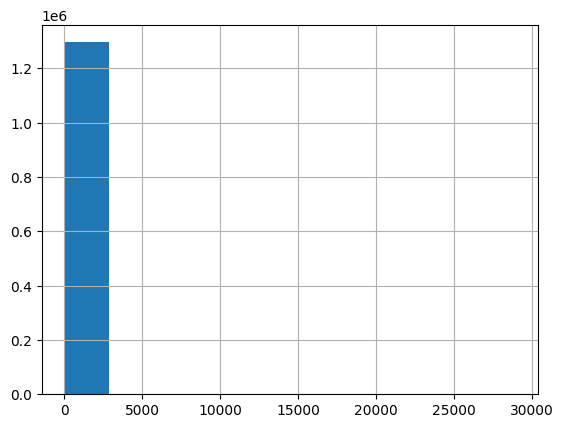

In [13]:
df['amt'].hist()

In [14]:
'''import plotly.express as px
fig = px.histogram(df, x='amt', title="Distribución de la cantidad")
# Mostrar la gráfica
fig.show()'''

'import plotly.express as px\nfig = px.histogram(df, x=\'amt\', title="Distribución de la cantidad")\n# Mostrar la gráfica\nfig.show()'

In [15]:
df['category'].value_counts() , df['category'].value_counts(1)*100

(category
 gas_transport     131659
 grocery_pos       123638
 home              123115
 shopping_pos      116672
 kids_pets         113035
 shopping_net       97543
 entertainment      94014
 food_dining        91461
 personal_care      90758
 health_fitness     85879
 misc_pos           79655
 misc_net           63287
 grocery_net        45452
 travel             40507
 Name: count, dtype: int64,
 category
 gas_transport    10.1536
 grocery_pos       9.5350
 home              9.4947
 shopping_pos      8.9978
 kids_pets         8.7173
 shopping_net      7.5225
 entertainment     7.2504
 food_dining       7.0535
 personal_care     6.9993
 health_fitness    6.6230
 misc_pos          6.1430
 misc_net          4.8807
 grocery_net       3.5053
 travel            3.1239
 Name: proportion, dtype: float64)

In [16]:
df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [17]:
df.describe(percentiles=np.arange(0,1.01,0.1))

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000,1296675.0000
mean,648337.0000,417192042079726656.0000,70.3510,48800.6711,38.5376,-90.2263,88824.4406,1349243636.7261,38.5373,-90.2265,0.0058
std,374317.9745,1308806447000240384.0000,160.3160,26893.2225,5.0758,13.7591,301956.3607,12841278.4234,5.1098,13.7711,0.0759
min,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0278,-166.6712,0.0000
0%,0.0000,60416207185.0000,1.0000,1257.0000,20.0271,-165.6723,23.0000,1325376018.0000,19.0278,-166.6712,0.0000
10%,129667.4000,4464457352619.0000,4.1100,13304.0000,31.7706,-111.0985,260.0000,1331555450.6000,31.6385,-111.2451,0.0000
20%,259334.8000,30427035050508.0000,7.7500,21102.0000,33.9056,-98.7388,566.0000,1336556658.8000,33.8206,-98.8402,0.0000
30%,389002.2000,213175487106448.0000,15.7400,29939.0000,35.9335,-95.2739,964.0000,1340797167.8000,35.8173,-95.1689,0.0000
40%,518669.6000,377654590313960.0000,32.1300,38761.0000,38.2352,-91.0286,1631.0000,1344732593.2000,38.0559,-91.0928,0.0000
50%,648337.0000,3521417320836166.0000,47.5200,48174.0000,39.3543,-87.4769,2456.0000,1349249747.0000,39.3657,-87.4384,0.0000


In [18]:
df['Unnamed: 0'].value_counts()

Unnamed: 0
1296674    1
0          1
1          1
1296635    1
1296636    1
          ..
6          1
7          1
8          1
9          1
10         1
Name: count, Length: 1296675, dtype: int64

In [19]:
df.rename(columns={'Unnamed: 0':'index'},inplace=True)

In [20]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

In [21]:
df['dob'] = pd.to_datetime(df['dob'])

In [22]:
df['zip'] = df['zip'].map( lambda z: str(z) if len(str(z)) == 5 else '0'+str(z) )

In [23]:
df['cc_num'] = df['cc_num'].astype(str)

In [24]:
df['amt'].describe(percentiles=[.95,.96,.97,.98,.99])

count   1296675.0000
mean         70.3510
std         160.3160
min           1.0000
50%          47.5200
95%         196.3100
96%         214.4600
97%         248.0678
98%         337.9800
99%         545.9926
max       28948.9000
Name: amt, dtype: float64

In [25]:
df[df['amt'] > 20000]

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
352894,352894,2019-06-14 20:15:38,5540636818935089,fraud_Hackett Group,travel,25086.9400,Kenneth,Foster,M,329 Michael Extension,Lawrence,MA,01843,42.6911,-71.1605,76383,Geoscientist,1985-04-04,0b902a1e549c98b949444a7557da2403,1339704938,42.3972,-71.4742,0
606211,606211,2019-09-14 22:19:01,30408301059761,fraud_Boyer-Haley,travel,26544.1200,Brandon,Pittman,M,2881 Frey Village,Cross,SC,29436,33.3364,-80.1859,4471,Occupational hygienist,1973-10-09,dda9d800d37a9fc2c086a836d66b0588,1347661141,33.0203,-80.1256,0
787549,787549,2019-12-01 16:19:23,4979422371139333,fraud_Satterfield-Lowe,travel,28948.9000,Kelly,Zimmerman,F,1893 Katie Tunnel,Westerville,NE,68881,41.4193,-99.3844,73,Product designer,1935-02-10,309c4bf7fc47b1ddee5ad883bcf634b6,1354378763,42.3173,-99.1395,0
793677,793677,2019-12-02 15:53:46,675909898057,"fraud_Monahan, Hermann and Johns",travel,27390.1200,Christopher,Henry,M,1198 Robert Stravenue Apt. 479,Armonk,NY,10504,41.1360,-73.7009,7987,Television/film/video producer,1964-03-16,2ca9bd5df126cc35e541a4f2c2551197,1354463626,41.6659,-74.6630,0
1234797,1234797,2020-05-30 17:31:30,60423098130,"fraud_Monahan, Hermann and Johns",travel,27119.7700,Jason,Gray,M,875 Amy Point,Amorita,OK,73719,36.9412,-98.2458,83,Barrister's clerk,1958-07-28,916093eeab1831be71d49362bf5b7be5,1369935090,37.2869,-97.2496,0


In [26]:
df['trans_date_trans_time'].min() , df['trans_date_trans_time'].max()

(Timestamp('2019-01-01 00:00:18'), Timestamp('2020-06-21 12:13:37'))

# Ingeniería de variables

In [27]:
df.columns

Index(['index', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [28]:
df.head(2)

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0


In [29]:
# Clasificación por región (Generar una ZONA) *
# Horas, Días, Días Semana, Año-Mes
# Franjas horarias
# Transacciones por Tarjeta
# Edad
# Nivel Socioeconómico :  *

In [30]:
df['hour_str'] = df['trans_date_trans_time'].map( lambda x: x.strftime('%H') )
df['week_day'] = df['trans_date_trans_time'].map( lambda x: x.weekday() )
df['day'] = df['trans_date_trans_time'].map( lambda x: x.day )

In [31]:
df['month'] = df['trans_date_trans_time'].map( lambda x: x.month )
df['year'] = df['trans_date_trans_time'].map( lambda x: x.year )

In [32]:
#df['week_day'].value_counts()

In [33]:
df['week_day_2'] = df['week_day'].map( dict(  zip(range(0,7,1) , 'LMXJVSD'))   )

In [34]:
df['age'] = ((df['trans_date_trans_time'] - df['dob']) / np.timedelta64(364,'D')).astype(int)

In [35]:
def franjas_hrs(hr):
    
    if hr < 6:
        r = 'madrugada'
    elif hr < 12:
        r = 'mañana'
    elif hr < 18:
        r = 'tarde'
    elif hr < 24:
        r = 'noche'
    else:
        r = 'error'

    return r

In [36]:
df['franja_hr'] = df['hour_str'].map( lambda hr: franjas_hrs( int(hr) ) )

In [37]:
df['count'] = df[['cc_num','trans_date_trans_time']].sort_values(['cc_num','trans_date_trans_time']).groupby(['cc_num']).cumcount()

In [38]:
df.head(2)

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_2,age,franja_hr,count
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0


# Variables / Definiciones

In [39]:
# Unidad Muestral
um = ['index']

# Target 
tgt = ['is_fraud']

# Discretas / Categóricas
vard = ['cc_num','merchant','category','first','last','gender','street','city','state','zip','job',
        'trans_num','hour_str', 'day', 'week_day_2', 'franja_hr' ]

# Continuas / Numéricas
varc = ['amt', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat','merch_long', 'week_day', 'age', 'count' ]

# Fechas
varfh = ['trans_date_trans_time','dob']

# Variables Fuera
var_fuera = []

In [40]:
# Convertir a números
for col in varc:
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte y pone NaN si hay errores

# Convertir a string
for col in vard:
    df[col] = df[col].astype(str)

# Análisis Exploratorio

## Discretro / Categórico

### Frecuencias

In [41]:
#vard

In [42]:
def freq(df, var):

    if type(var) != list:
        var = [var]
    for v in var:
        #v = 'state'
        aux = df[v].value_counts().to_frame().rename(columns={'count':'FA'})
        aux['FR'] = aux['FA'] / aux['FA'].sum()
        aux[['FAA','FRA']] = aux.apply(  np.cumsum )
        print(f"La variable: {v}")
        display(aux)
        print("\n")

In [43]:
freq( df , vard )

La variable: cc_num


,FA,FR,FAA,FRA
cc_num,,,,
4512828414983801773,3123,0.0024,3123,0.0024
571365235126,3123,0.0024,6246,0.0048
36722699017270,3119,0.0024,9365,0.0072
213112402583773,3117,0.0024,12482,0.0096
3545109339866548,3113,0.0024,15595,0.0120
...,...,...,...,...
180097223252063,7,0.0000,1296647,1.0000
340187018810220,7,0.0000,1296654,1.0000
501894933032,7,0.0000,1296661,1.0000




La variable: merchant


,FA,FR,FAA,FRA
merchant,,,,
fraud_Kilback LLC,4403,0.0034,4403,0.0034
fraud_Cormier LLC,3649,0.0028,8052,0.0062
fraud_Schumm PLC,3634,0.0028,11686,0.0090
fraud_Kuhn LLC,3510,0.0027,15196,0.0117
fraud_Boyer PLC,3493,0.0027,18689,0.0144
...,...,...,...,...
"fraud_Douglas, DuBuque and McKenzie",775,0.0006,1293661,0.9977
fraud_Treutel-King,775,0.0006,1294436,0.9983
"fraud_Medhurst, Labadie and Gottlieb",759,0.0006,1295195,0.9989




La variable: category


,FA,FR,FAA,FRA
category,,,,
gas_transport,131659,0.1015,131659,0.1015
grocery_pos,123638,0.0954,255297,0.1969
home,123115,0.0949,378412,0.2918
shopping_pos,116672,0.0900,495084,0.3818
kids_pets,113035,0.0872,608119,0.4690
shopping_net,97543,0.0752,705662,0.5442
entertainment,94014,0.0725,799676,0.6167
food_dining,91461,0.0705,891137,0.6872
personal_care,90758,0.0700,981895,0.7572




La variable: first


,FA,FR,FAA,FRA
first,,,,
Christopher,26669,0.0206,26669,0.0206
Robert,21667,0.0167,48336,0.0373
Jessica,20581,0.0159,68917,0.0531
James,20039,0.0155,88956,0.0686
Michael,20009,0.0154,108965,0.0840
...,...,...,...,...
Arthur,9,0.0000,1296645,1.0000
Phyllis,8,0.0000,1296653,1.0000
Molly,8,0.0000,1296661,1.0000




La variable: last


,FA,FR,FAA,FRA
last,,,,
Smith,28794,0.0222,28794,0.0222
Williams,23605,0.0182,52399,0.0404
Davis,21910,0.0169,74309,0.0573
Johnson,20034,0.0155,94343,0.0728
Rodriguez,17394,0.0134,111737,0.0862
...,...,...,...,...
Wells,9,0.0000,1296644,1.0000
Peterson,9,0.0000,1296653,1.0000
Strong,8,0.0000,1296661,1.0000




La variable: gender


,FA,FR,FAA,FRA
gender,,,,
F,709863,0.5474,709863,0.5474
M,586812,0.4526,1296675,1.0000




La variable: street


,FA,FR,FAA,FRA
street,,,,
864 Reynolds Plains,3123,0.0024,3123,0.0024
0069 Robin Brooks Apt. 695,3123,0.0024,6246,0.0048
8172 Robertson Parkways Suite 072,3119,0.0024,9365,0.0072
4664 Sanchez Common Suite 930,3117,0.0024,12482,0.0096
8030 Beck Motorway,3113,0.0024,15595,0.0120
...,...,...,...,...
7281 Joshua Mills Apt. 077,7,0.0000,1296647,1.0000
27954 Hall Mill Suite 575,7,0.0000,1296654,1.0000
9599 Washington Field Suite 238,7,0.0000,1296661,1.0000




La variable: city


,FA,FR,FAA,FRA
city,,,,
Birmingham,5617,0.0043,5617,0.0043
San Antonio,5130,0.0040,10747,0.0083
Utica,5105,0.0039,15852,0.0122
Phoenix,5075,0.0039,20927,0.0161
Meridian,5060,0.0039,25987,0.0200
...,...,...,...,...
Claypool,7,0.0000,1296647,1.0000
Norfolk,7,0.0000,1296654,1.0000
Bruce,7,0.0000,1296661,1.0000




La variable: state


,FA,FR,FAA,FRA
state,,,,
TX,94876,0.0732,94876,0.0732
NY,83501,0.0644,178377,0.1376
PA,79847,0.0616,258224,0.1991
CA,56360,0.0435,314584,0.2426
OH,46480,0.0358,361064,0.2785
MI,46154,0.0356,407218,0.3140
IL,43252,0.0334,450470,0.3474
FL,42671,0.0329,493141,0.3803
AL,40989,0.0316,534130,0.4119




La variable: zip


,FA,FR,FAA,FRA
zip,,,,
73754,3646,0.0028,3646,0.0028
34112,3613,0.0028,7259,0.0056
48088,3597,0.0028,10856,0.0084
82514,3527,0.0027,14383,0.0111
49628,3123,0.0024,17506,0.0135
...,...,...,...,...
10018,7,0.0000,1296647,1.0000
46510,7,0.0000,1296654,1.0000
38915,7,0.0000,1296661,1.0000




La variable: job


,FA,FR,FAA,FRA
job,,,,
Film/video editor,9779,0.0075,9779,0.0075
Exhibition designer,9199,0.0071,18978,0.0146
Naval architect,8684,0.0067,27662,0.0213
"Surveyor, land/geomatics",8680,0.0067,36342,0.0280
Materials engineer,8270,0.0064,44612,0.0344
...,...,...,...,...
Veterinary surgeon,8,0.0000,1296646,1.0000
Information officer,8,0.0000,1296654,1.0000
Contracting civil engineer,7,0.0000,1296661,1.0000




La variable: trans_num


,FA,FR,FAA,FRA
trans_num,,,,
8f7c8e4ab7f25875d753b422917c98c9,1,0.0000,1,0.0000
0b242abb623afc578575680df30655b9,1,0.0000,2,0.0000
1f76529f8574734946361c461b024d99,1,0.0000,3,0.0000
566169c2e5ed46feceb436dcf2464849,1,0.0000,4,0.0000
e064f1755c6491e6196a8798d3cd4c4c,1,0.0000,5,0.0000
...,...,...,...,...
83ec1cc84142af6e2acf10c44949e720,1,0.0000,1296671,1.0000
6d294ed2cc447d2c71c7171a3d54967c,1,0.0000,1296672,1.0000
fc28024ce480f8ef21a32d64c93a29f5,1,0.0000,1296673,1.0000




La variable: hour_str


,FA,FR,FAA,FRA
hour_str,,,,
23,67104,0.0518,67104,0.0518
22,66982,0.0517,134086,0.1034
18,66051,0.0509,200137,0.1543
16,65726,0.0507,265863,0.2050
21,65533,0.0505,331396,0.2556
19,65508,0.0505,396904,0.3061
17,65450,0.0505,462354,0.3566
15,65391,0.0504,527745,0.4070
13,65314,0.0504,593059,0.4574




La variable: day


,FA,FR,FAA,FRA
day,,,,
1,47089,0.0363,47089,0.0363
15,46213,0.0356,93302,0.0720
8,46201,0.0356,139503,0.1076
16,44894,0.0346,184397,0.1422
2,44748,0.0345,229145,0.1767
9,44685,0.0345,273830,0.2112
7,44239,0.0341,318069,0.2453
14,44015,0.0339,362084,0.2792
28,43470,0.0335,405554,0.3128




La variable: week_day_2


,FA,FR,FAA,FRA
week_day_2,,,,
L,254282,0.1961,254282,0.1961
D,250579,0.1932,504861,0.3894
S,200957,0.1550,705818,0.5443
M,160227,0.1236,866045,0.6679
V,152272,0.1174,1018317,0.7853
J,147285,0.1136,1165602,0.8989
X,131073,0.1011,1296675,1.0000




La variable: franja_hr


,FA,FR,FAA,FRA
franja_hr,,,,
noche,396276,0.3056,396276,0.3056
tarde,392023,0.3023,788299,0.6079
madrugada,254830,0.1965,1043129,0.8045
mañana,253546,0.1955,1296675,1.0000


### Normalizar

In [44]:
def normalizar(df, v, umbral):
    #umbral = 0.03 # 0.05
    aux = df[v].value_counts(True).to_frame()
    aux[f"n_{v}"] = np.where( aux['proportion'] < umbral , 'CAT_PEQUE' ,aux.index )
    
    moda  = aux.head()[f'n_{v}'].values[0]
    
    if aux.loc[ aux[f'n_{v}'] == 'CAT_PEQUE' ]['proportion'].sum() < umbral:
        aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)
    
    aux.reset_index(inplace=True)

    return df.merge( aux , left_on=[v] , right_on=[v] , how='inner' ).drop('proportion',axis=1)

In [45]:
umbral = 0.03
for v in vard:
    print(f"Normalizando: {v}")
    df =  normalizar( df , v, umbral)

Normalizando: cc_num
Normalizando: merchant
Normalizando: category


/tmp/ipykernel_6412/3572664529.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)


Normalizando: first
Normalizando: last
Normalizando: gender


/tmp/ipykernel_6412/3572664529.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)


Normalizando: street
Normalizando: city
Normalizando: state
Normalizando: zip
Normalizando: job
Normalizando: trans_num
Normalizando: hour_str


/tmp/ipykernel_6412/3572664529.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)


Normalizando: day


/tmp/ipykernel_6412/3572664529.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)


Normalizando: week_day_2


/tmp/ipykernel_6412/3572664529.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)


Normalizando: franja_hr


/tmp/ipykernel_6412/3572664529.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  aux[f'n_{v}'].replace({'CAT_PEQUE':moda},inplace=True)


In [46]:
varn =  df.filter(like='n_').columns.tolist()

In [47]:
freq( df , varn )

La variable: n_cc_num


,FA,FR,FAA,FRA
n_cc_num,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_merchant


,FA,FR,FAA,FRA
n_merchant,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_category


,FA,FR,FAA,FRA
n_category,,,,
gas_transport,131659,0.1015,131659,0.1015
grocery_pos,123638,0.0954,255297,0.1969
home,123115,0.0949,378412,0.2918
shopping_pos,116672,0.0900,495084,0.3818
kids_pets,113035,0.0872,608119,0.4690
shopping_net,97543,0.0752,705662,0.5442
entertainment,94014,0.0725,799676,0.6167
food_dining,91461,0.0705,891137,0.6872
personal_care,90758,0.0700,981895,0.7572




La variable: n_first


,FA,FR,FAA,FRA
n_first,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_last


,FA,FR,FAA,FRA
n_last,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_gender


,FA,FR,FAA,FRA
n_gender,,,,
F,709863,0.5474,709863,0.5474
M,586812,0.4526,1296675,1.0000




La variable: n_street


,FA,FR,FAA,FRA
n_street,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_city


,FA,FR,FAA,FRA
n_city,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_state


,FA,FR,FAA,FRA
n_state,,,,
CAT_PEQUE,762545,0.5881,762545,0.5881
TX,94876,0.0732,857421,0.6612
NY,83501,0.0644,940922,0.7256
PA,79847,0.0616,1020769,0.7872
CA,56360,0.0435,1077129,0.8307
OH,46480,0.0358,1123609,0.8665
MI,46154,0.0356,1169763,0.9021
IL,43252,0.0334,1213015,0.9355
FL,42671,0.0329,1255686,0.9684




La variable: n_zip


,FA,FR,FAA,FRA
n_zip,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_job


,FA,FR,FAA,FRA
n_job,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_trans_num


,FA,FR,FAA,FRA
n_trans_num,,,,
CAT_PEQUE,1296675,1.0000,1296675,1.0000




La variable: n_hour_str


,FA,FR,FAA,FRA
n_hour_str,,,,
23,67104,0.0518,67104,0.0518
22,66982,0.0517,134086,0.1034
18,66051,0.0509,200137,0.1543
16,65726,0.0507,265863,0.2050
21,65533,0.0505,331396,0.2556
19,65508,0.0505,396904,0.3061
17,65450,0.0505,462354,0.3566
15,65391,0.0504,527745,0.4070
13,65314,0.0504,593059,0.4574




La variable: n_day


,FA,FR,FAA,FRA
n_day,,,,
1,71790,0.0554,71790,0.0554
15,46213,0.0356,118003,0.0910
8,46201,0.0356,164204,0.1266
16,44894,0.0346,209098,0.1613
2,44748,0.0345,253846,0.1958
9,44685,0.0345,298531,0.2302
7,44239,0.0341,342770,0.2643
14,44015,0.0339,386785,0.2983
28,43470,0.0335,430255,0.3318




La variable: n_week_day_2


,FA,FR,FAA,FRA
n_week_day_2,,,,
L,254282,0.1961,254282,0.1961
D,250579,0.1932,504861,0.3894
S,200957,0.1550,705818,0.5443
M,160227,0.1236,866045,0.6679
V,152272,0.1174,1018317,0.7853
J,147285,0.1136,1165602,0.8989
X,131073,0.1011,1296675,1.0000




La variable: n_franja_hr


,FA,FR,FAA,FRA
n_franja_hr,,,,
noche,396276,0.3056,396276,0.3056
tarde,392023,0.3023,788299,0.6079
madrugada,254830,0.1965,1043129,0.8045
mañana,253546,0.1955,1296675,1.0000



### Unarias

In [48]:
# Variables categóricas que solo tienen una sola "categoría" o un valor único

In [49]:
unarias = [ v for v, conteo, in   zip( varn , [ df[v].unique().shape[0] for v in varn ]) if conteo == 1 ]

In [50]:
unarias

['n_cc_num',
 'n_merchant',
 'n_first',
 'n_last',
 'n_street',
 'n_city',
 'n_zip',
 'n_job',
 'n_trans_num']

In [51]:
df[unarias].head(3)

,n_cc_num,n_merchant,n_first,n_last,n_street,n_city,n_zip,n_job,n_trans_num
0,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
1,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE
2,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE


In [52]:
varn = [ v for v in varn if v not in unarias ]

In [53]:
varn

['n_category',
 'n_gender',
 'n_state',
 'n_hour_str',
 'n_day',
 'n_week_day_2',
 'n_franja_hr']

## Continuas / Numéricas

### Discretizar

In [54]:
from sklearn.preprocessing import KBinsDiscretizer

In [55]:
varc

['amt',
 'lat',
 'long',
 'city_pop',
 'unix_time',
 'merch_lat',
 'merch_long',
 'week_day',
 'age',
 'count']

In [56]:
# ESTÁ FUNCIÓN FUE LA INCORRECTA, agregué temas de validación númerica y eliminación de nans
def discretizar( df_aux , v , k):
    kb = KBinsDiscretizer( n_bins=k, encode='ordinal', strategy='quantile' )
    kb.fit(df_aux[[v]])
    df_aux[f'd_{v}_{k}'] = pd.cut( df_aux[v] , bins= kb.bin_edges_[0] , include_lowest=True  ).astype(str)
    return df_aux

In [57]:
def discretizar_2(df_aux, v, k):
    
    kb = KBinsDiscretizer(n_bins=k, encode='ordinal', strategy='quantile', subsample=None)
    df_aux = df_aux.copy()

    # Asegurar que no haya valores NaN antes de discretizar
    df_aux[v] = pd.to_numeric(df_aux[v], errors='coerce')
    df_aux = df_aux.dropna(subset=[v])

    # Ajustar el discretizador
    kb.fit(df_aux[[v]])

    # Obtener los intervalos como strings usando pd.cut()
    bins = kb.bin_edges_[0]  # Extraer los límites de los bins
    df_aux[f'd_{v}_{k}'] = pd.cut(df_aux[v], bins=bins, include_lowest=True).astype(str)

    return df_aux

In [58]:
#df['d_age_5'].value_counts() , df['d_age_5'].value_counts(1)

In [59]:
%%time
for v in varc:
    for k in range(2, 6):
        # cuando k es mayor al número de valores únicos
        if df[v].nunique() < k:
            print(f"Saltando {v} con {k} bins porque tiene pocos valores únicos.")
            continue
        print(f"Para la variable {v}, con {k} bins.")
        #df = discretizar(df, v, k)
        df = discretizar_2(df, v, k)

Para la variable amt, con 2 bins.
Para la variable amt, con 3 bins.
Para la variable amt, con 4 bins.
Para la variable amt, con 5 bins.
Para la variable lat, con 2 bins.
Para la variable lat, con 3 bins.
Para la variable lat, con 4 bins.
Para la variable lat, con 5 bins.
Para la variable long, con 2 bins.
Para la variable long, con 3 bins.
Para la variable long, con 4 bins.
Para la variable long, con 5 bins.
Para la variable city_pop, con 2 bins.
Para la variable city_pop, con 3 bins.
Para la variable city_pop, con 4 bins.
Para la variable city_pop, con 5 bins.
Para la variable unix_time, con 2 bins.
Para la variable unix_time, con 3 bins.
Para la variable unix_time, con 4 bins.
Para la variable unix_time, con 5 bins.
Para la variable merch_lat, con 2 bins.
Para la variable merch_lat, con 3 bins.
Para la variable merch_lat, con 4 bins.
Para la variable merch_lat, con 5 bins.
Para la variable merch_long, con 2 bins.
Para la variable merch_long, con 3 bins.
Para la variable merch_long, c

In [60]:
# guardar mis variables discretizadas
vari = df.filter( like='d_' ).columns.tolist()

In [61]:
# Validación de proporción de los bines.
for v in vari:
    print(f"La variable: {v}")
    display(df[v].value_counts(True))
    print("\n")

La variable: d_amt_2


d_amt_2
(0.999, 47.52]     0.5001
(47.52, 28948.9]   0.4999
Name: proportion, dtype: float64



La variable: d_amt_3


d_amt_3
(0.999, 20.98]     0.3334
(20.98, 70.54]     0.3333
(70.54, 28948.9]   0.3333
Name: proportion, dtype: float64



La variable: d_amt_4


d_amt_4
(0.999, 9.65]      0.2501
(47.52, 83.14]     0.2500
(83.14, 28948.9]   0.2500
(9.65, 47.52]      0.2499
Name: proportion, dtype: float64



La variable: d_amt_5


d_amt_5
(0.999, 7.75]      0.2003
(60.94, 94.68]     0.2000
(94.68, 28948.9]   0.2000
(32.13, 60.94]     0.2000
(7.75, 32.13]      0.1998
Name: proportion, dtype: float64



La variable: d_lat_2


d_lat_2
(20.026, 39.354]   0.5005
(39.354, 66.693]   0.4995
Name: proportion, dtype: float64



La variable: d_lat_3


d_lat_3
(20.026, 36.499]   0.3345
(36.499, 41.044]   0.3329
(41.044, 66.693]   0.3325
Name: proportion, dtype: float64



La variable: d_lat_4


d_lat_4
(34.62, 39.354]   0.2505
(39.354, 41.94]   0.2500
(20.026, 34.62]   0.2500
(41.94, 66.693]   0.2495
Name: proportion, dtype: float64



La variable: d_lat_5


d_lat_5
(20.026, 33.906]   0.2017
(38.235, 40.497]   0.2013
(42.685, 66.693]   0.1997
(40.497, 42.685]   0.1989
(33.906, 38.235]   0.1984
Name: proportion, dtype: float64



La variable: d_long_2


d_long_2
(-165.673, -87.477]   0.5004
(-87.477, -67.95]     0.4996
Name: proportion, dtype: float64



La variable: d_long_3


d_long_3
(-93.828, -82.136]    0.3335
(-165.673, -93.828]   0.3335
(-82.136, -67.95]     0.3331
Name: proportion, dtype: float64



La variable: d_long_4


d_long_4
(-87.477, -80.158]    0.2505
(-165.673, -96.798]   0.2503
(-96.798, -87.477]    0.2501
(-80.158, -67.95]     0.2491
Name: proportion, dtype: float64



La variable: d_long_5


d_long_5
(-165.673, -98.739]   0.2009
(-98.739, -91.029]    0.2003
(-78.803, -67.95]     0.1999
(-91.029, -84.148]    0.1995
(-84.148, -78.803]    0.1993
Name: proportion, dtype: float64



La variable: d_city_pop_2


d_city_pop_2
(22.999, 2456.0]      0.5011
(2456.0, 2906700.0]   0.4989
Name: proportion, dtype: float64



La variable: d_city_pop_3


d_city_pop_3
(22.999, 1178.0]      0.3337
(1178.0, 6841.0]      0.3333
(6841.0, 2906700.0]   0.3329
Name: proportion, dtype: float64



La variable: d_city_pop_4


d_city_pop_4
(22.999, 743.0]        0.2526
(2456.0, 20328.0]      0.2494
(20328.0, 2906700.0]   0.2494
(743.0, 2456.0]        0.2485
Name: proportion, dtype: float64



La variable: d_city_pop_5


d_city_pop_5
(566.0, 1631.0]        0.2010
(22.999, 566.0]        0.2001
(4680.0, 42384.0]      0.1999
(42384.0, 2906700.0]   0.1999
(1631.0, 4680.0]       0.1991
Name: proportion, dtype: float64



La variable: d_unix_time_2


d_unix_time_2
(1325376017.999, 1349249747.0]   0.5000
(1349249747.0, 1371816817.0]     0.5000
Name: proportion, dtype: float64



La variable: d_unix_time_3


d_unix_time_3
(1325376017.999, 1342136943.667]   0.3333
(1342136943.667, 1355850413.0]     0.3333
(1355850413.0, 1371816817.0]       0.3333
Name: proportion, dtype: float64



La variable: d_unix_time_4


d_unix_time_4
(1325376017.999, 1338750742.5]   0.2500
(1338750742.5, 1349249747.0]     0.2500
(1359385375.5, 1371816817.0]     0.2500
(1349249747.0, 1359385375.5]     0.2500
Name: proportion, dtype: float64



La variable: d_unix_time_5


d_unix_time_5
(1325376017.999, 1336556658.8]   0.2000
(1336556658.8, 1344732593.2]     0.2000
(1344732593.2, 1354217831.8]     0.2000
(1354217831.8, 1362554134.2]     0.2000
(1362554134.2, 1371816817.0]     0.2000
Name: proportion, dtype: float64



La variable: d_merch_lat_2


d_merch_lat_2
(19.026999999999997, 39.366]   0.5000
(39.366, 67.51]                0.5000
Name: proportion, dtype: float64



La variable: d_merch_lat_3


d_merch_lat_3
(19.026999999999997, 36.599]   0.3333
(41.056, 67.51]                0.3333
(36.599, 41.056]               0.3333
Name: proportion, dtype: float64



La variable: d_merch_lat_4


d_merch_lat_4
(34.734, 39.366]               0.2500
(41.957, 67.51]                0.2500
(19.026999999999997, 34.734]   0.2500
(39.366, 41.957]               0.2500
Name: proportion, dtype: float64



La variable: d_merch_lat_5


d_merch_lat_5
(33.821, 38.056]               0.2000
(42.65, 67.51]                 0.2000
(40.408, 42.65]                0.2000
(19.026999999999997, 33.821]   0.2000
(38.056, 40.408]               0.2000
Name: proportion, dtype: float64



La variable: d_merch_long_2


d_merch_long_2
(-166.672, -87.438]   0.5000
(-87.438, -66.951]    0.5000
Name: proportion, dtype: float64



La variable: d_merch_long_3


d_merch_long_3
(-82.225, -66.951]    0.3333
(-166.672, -93.805]   0.3333
(-93.805, -82.225]    0.3333
Name: proportion, dtype: float64



La variable: d_merch_long_4


d_merch_long_4
(-166.672, -96.897]   0.2500
(-80.237, -66.951]    0.2500
(-96.897, -87.438]    0.2500
(-87.438, -80.237]    0.2500
Name: proportion, dtype: float64



La variable: d_merch_long_5


d_merch_long_5
(-84.115, -78.824]   0.2000
(-166.672, -98.84]   0.2000
(-78.824, -66.951]   0.2000
(-91.093, -84.115]   0.2000
(-98.84, -91.093]    0.2000
Name: proportion, dtype: float64



La variable: d_week_day_2


d_week_day_2
(-0.001, 3.0]   0.5343
(3.0, 6.0]      0.4657
Name: proportion, dtype: float64



La variable: d_week_day_3


d_week_day_3
(-0.001, 2.0]   0.4208
(2.0, 5.0]      0.3860
(5.0, 6.0]      0.1932
Name: proportion, dtype: float64



La variable: d_week_day_4


d_week_day_4
(-0.001, 1.0]   0.3197
(3.0, 5.0]      0.2724
(1.0, 3.0]      0.2147
(5.0, 6.0]      0.1932
Name: proportion, dtype: float64



La variable: d_week_day_5


d_week_day_5
(-0.001, 1.0]   0.3197
(2.0, 4.0]      0.2310
(5.0, 6.0]      0.1932
(4.0, 5.0]      0.1550
(1.0, 2.0]      0.1011
Name: proportion, dtype: float64



La variable: d_age_2


d_age_2
(12.999, 44.0]   0.5225
(44.0, 95.0]     0.4775
Name: proportion, dtype: float64



La variable: d_age_3


d_age_3
(12.999, 35.0]   0.3404
(35.0, 51.0]     0.3324
(51.0, 95.0]     0.3272
Name: proportion, dtype: float64



La variable: d_age_4


d_age_4
(32.0, 44.0]     0.2653
(12.999, 32.0]   0.2572
(44.0, 57.0]     0.2396
(57.0, 95.0]     0.2379
Name: proportion, dtype: float64



La variable: d_age_5


d_age_5
(12.999, 30.0]   0.2065
(30.0, 39.0]     0.2047
(60.0, 95.0]     0.1988
(47.0, 60.0]     0.1985
(39.0, 47.0]     0.1915
Name: proportion, dtype: float64



La variable: d_count_2


d_count_2
(-0.001, 777.0]   0.5005
(777.0, 3122.0]   0.4995
Name: proportion, dtype: float64



La variable: d_count_3


d_count_3
(-0.001, 475.0]    0.3339
(1118.0, 3122.0]   0.3333
(475.0, 1118.0]    0.3328
Name: proportion, dtype: float64



La variable: d_count_4


d_count_4
(-0.001, 356.0]    0.2506
(356.0, 777.0]     0.2499
(1342.0, 3122.0]   0.2499
(777.0, 1342.0]    0.2497
Name: proportion, dtype: float64



La variable: d_count_5


d_count_5
(284.0, 588.0]     0.2002
(-0.001, 284.0]    0.2001
(1476.0, 3122.0]   0.2000
(965.0, 1476.0]    0.1999
(588.0, 965.0]     0.1997
Name: proportion, dtype: float64

### IV - Función

In [62]:
df[vard].isna().sum()

cc_num        0
merchant      0
category      0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
job           0
trans_num     0
hour_str      0
day           0
week_day_2    0
franja_hr     0
dtype: int64

In [63]:
varn

['n_category',
 'n_gender',
 'n_state',
 'n_hour_str',
 'n_day',
 'n_week_day_2',
 'n_franja_hr']

In [64]:
def calculo_iv(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v , columns=tgt, values=um[0], aggfunc='count', fill_value=0 )
    aux[ list(range(2)) ] = aux/aux.apply(np.sum)
    aux['w'] = np.log( aux[0] / aux[1] )
    aux['iv'] = (aux[0] - aux[1])*aux['w']

    return v, aux['iv'].sum()

# Partición de datos

In [65]:
# Se recomienda particionar los datos previo a la conversión / estandarización de los datos

In [66]:
X = df[um + vari ]
y = df[um + tgt ]

In [67]:
Xt, Xv , yt , yv = train_test_split(X, y, train_size=valor_particion , random_state=semilla)

In [68]:
Xt.shape, Xv.shape , yt.shape , yv.shape 

((972506, 41), (324169, 41), (972506, 2), (324169, 2))

In [69]:
Xt = Xt.merge(yt, on=um, how='inner').reset_index(drop=True)

### Mejores Variables Discretizadas

In [70]:
# IV de discretas -> vari
iv = pd.DataFrame(  map( lambda v: calculo_iv( df, v, tgt, um ) , vari ), columns=['variable','iv']  )

In [71]:
iv['raiz'] = iv['variable'].map( lambda x: '_'.join(x.split('_')[1:-1] ) )
iv = iv.sort_values( by=['raiz','iv','variable'], ascending=[0,0,0] ).reset_index(drop=True)
iv = iv.loc[ iv['iv'] != np.inf ].reset_index(drop=True)

In [72]:
iv['id']=iv.groupby('raiz').cumcount()+1

In [73]:
iv = iv[iv['id'] == 1].reset_index(drop=True)

In [74]:
iv

,variable,iv,raiz,id
0,d_week_day_5,0.0213,week_day,1
1,d_unix_time_5,0.0333,unix_time,1
2,d_merch_long_5,0.0032,merch_long,1
3,d_merch_lat_5,0.0023,merch_lat,1
4,d_long_5,0.0039,long,1
5,d_lat_3,0.0027,lat,1
6,d_count_5,0.2471,count,1
7,d_city_pop_3,0.0015,city_pop,1
8,d_amt_5,3.2074,amt,1
9,d_age_5,0.0550,age,1


In [75]:
besti = iv['variable'].tolist()

In [76]:
X[besti].head()

,d_week_day_5,d_unix_time_5,d_merch_long_5,d_merch_lat_5,d_long_5,d_lat_3,d_count_5,d_city_pop_3,d_amt_5,d_age_5
0,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-84.115, -78.824]","(33.821, 38.056]","(-84.148, -78.803]","(20.026, 36.499]","(-0.001, 284.0]","(1178.0, 6841.0]","(0.999, 7.75]","(12.999, 30.0]"
1,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-166.672, -98.84]","(42.65, 67.51]","(-165.673, -98.739]","(41.044, 66.693]","(-0.001, 284.0]","(22.999, 1178.0]","(94.68, 28948.9]","(39.0, 47.0]"
2,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-166.672, -98.84]","(42.65, 67.51]","(-165.673, -98.739]","(41.044, 66.693]","(-0.001, 284.0]","(1178.0, 6841.0]","(94.68, 28948.9]","(47.0, 60.0]"
3,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-166.672, -98.84]","(42.65, 67.51]","(-165.673, -98.739]","(41.044, 66.693]","(-0.001, 284.0]","(1178.0, 6841.0]","(32.13, 60.94]","(47.0, 60.0]"
4,"(-0.001, 1.0]","(1325376017.999, 1336556658.8]","(-78.824, -66.951]","(38.056, 40.408]","(-84.148, -78.803]","(36.499, 41.044]","(-0.001, 284.0]","(22.999, 1178.0]","(32.13, 60.94]","(30.0, 39.0]"


## Las mejores variables finales

In [77]:
X = df[um + varn ]
y = df[um + tgt ]

In [78]:
Xt, Xv , yt , yv = train_test_split(X, y, train_size=valor_particion, random_state=semilla)

In [79]:
Xt.shape, Xv.shape , yt.shape , yv.shape 

((972506, 8), (324169, 8), (972506, 2), (324169, 2))

In [80]:
Xt = Xt.merge(yt, on=um, how='inner').reset_index(drop=True)

In [81]:
iv2 = pd.DataFrame(  map( lambda v: calculo_iv( df, v, tgt, um ) , varn ), columns=['variable','iv']  )

In [82]:
iv2

,variable,iv
0,n_category,0.7582
1,n_gender,0.0101
2,n_state,0.0052
3,n_hour_str,1.8622
4,n_day,0.0322
5,n_week_day_2,0.0252
6,n_franja_hr,0.8897


In [83]:
iv = pd.concat( [iv,iv2] , ignore_index=True )

In [84]:
iv = iv[['variable','iv']].sort_values(by='iv',ascending=False).reset_index(drop=True)

In [85]:
iv

,variable,iv
0,d_amt_5,3.2074
1,n_hour_str,1.8622
2,n_franja_hr,0.8897
3,n_category,0.7582
4,d_count_5,0.2471
5,d_age_5,0.0550
6,d_unix_time_5,0.0333
7,n_day,0.0322
8,n_week_day_2,0.0252
9,d_week_day_5,0.0213


#### Descartar variables

In [86]:
iv_final = iv.loc[  (iv['iv'] >= 0.01 ) & (iv['iv'] <= 0.9) ].reset_index(drop=True)

In [87]:
iv_final

,variable,iv
0,n_franja_hr,0.8897
1,n_category,0.7582
2,d_count_5,0.2471
3,d_age_5,0.0550
4,d_unix_time_5,0.0333
5,n_day,0.0322
6,n_week_day_2,0.0252
7,d_week_day_5,0.0213
8,n_gender,0.0101


In [88]:
best = iv_final['variable'].tolist()

In [89]:
best

['n_franja_hr',
 'n_category',
 'd_count_5',
 'd_age_5',
 'd_unix_time_5',
 'n_day',
 'n_week_day_2',
 'd_week_day_5',
 'n_gender']

In [90]:
df[best]

,n_franja_hr,n_category,d_count_5,d_age_5,d_unix_time_5,n_day,n_week_day_2,d_week_day_5,n_gender
0,madrugada,misc_net,"(-0.001, 284.0]","(12.999, 30.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",F
1,madrugada,grocery_pos,"(-0.001, 284.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",F
2,madrugada,entertainment,"(-0.001, 284.0]","(47.0, 60.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",M
3,madrugada,gas_transport,"(-0.001, 284.0]","(47.0, 60.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",M
4,madrugada,misc_pos,"(-0.001, 284.0]","(30.0, 39.0]","(1325376017.999, 1336556658.8]",1,M,"(-0.001, 1.0]",M
...,...,...,...,...,...,...,...,...,...
1296670,tarde,entertainment,"(1476.0, 3122.0]","(47.0, 60.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M
1296671,tarde,food_dining,"(284.0, 588.0]","(39.0, 47.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M
1296672,tarde,food_dining,"(1476.0, 3122.0]","(47.0, 60.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M
1296673,tarde,food_dining,"(1476.0, 3122.0]","(30.0, 39.0]","(1362554134.2, 1371816817.0]",21,D,"(5.0, 6.0]",M


## Transformación WoE

In [91]:
X = df[um + best ]
y = df[um + tgt ]
Xt, Xv , yt , yv = train_test_split(X, y, train_size=valor_particion, random_state=semilla)
print(Xt.shape, Xv.shape , yt.shape , yv.shape )
Xt = Xt.merge(yt, on=um, how='inner').reset_index(drop=True)

(972506, 10) (324169, 10) (972506, 2) (324169, 2)


In [92]:
def clasificacion_woe(df , v, tgt, um):
    #v = 'n_week_day_2'
    aux = df.pivot_table( index = v , 
                          columns=tgt, 
                         values=um[0], 
                         aggfunc='count', 
                         fill_value=0 )
    
    aux[ list(range(2)) ] = aux/aux.apply(np.sum)
    
    aux['w'] = np.log( aux[0] / aux[1] )

    aux.drop(range(2),axis=1,inplace=True)
    
    aux = aux.to_dict()['w']

    return v, aux

In [93]:
mapa_woe = list( map( lambda v: clasificacion_woe( Xt , v , tgt , um) , best ) )

In [94]:
mapa_woe

[('n_franja_hr',
  {'madrugada': -0.5923536615568867,
   'mañana': 1.6325276516056437,
   'noche': -0.5849638351162791,
   'tarde': 1.5923363460391515}),
 ('n_category',
  {'entertainment': 0.866874283446278,
   'food_dining': 1.3387612449783488,
   'gas_transport': 0.20284455619176667,
   'grocery_net': 0.6161309921551295,
   'grocery_pos': -0.9047088170548091,
   'health_fitness': 1.3134716633244579,
   'home': 1.3094170888376206,
   'kids_pets': 0.9848214251833778,
   'misc_net': -0.9462144960365017,
   'misc_pos': 0.5875534770525052,
   'personal_care': 0.9558504337351217,
   'shopping_net': -1.1107511850783074,
   'shopping_pos': -0.20847377352384838,
   'travel': 0.6674615622143241}),
 ('d_count_5',
  {'(-0.001, 284.0]': -0.6748276773523002,
   '(1476.0, 3122.0]': 0.7224996305826573,
   '(284.0, 588.0]': -0.1412533746799385,
   '(588.0, 965.0]': 0.20780142145523417,
   '(965.0, 1476.0]': 0.5230163977161273}),
 ('d_age_5',
  {'(12.999, 30.0]': -0.01853685044895754,
   '(30.0, 39.0

In [95]:
for v, mapa in mapa_woe:
    Xt[f'w_{v}'] = Xt[v].replace(mapa)
    Xv[f'w_{v}'] = Xv[v].replace(mapa)

/tmp/ipykernel_6412/2046403577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xt[f'w_{v}'] = Xt[v].replace(mapa)
/tmp/ipykernel_6412/2046403577.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Xv[f'w_{v}'] = Xv[v].replace(mapa)
/tmp/ipykernel_6412/2046403577.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcast

In [96]:
varw = Xt.filter(like='w_').columns.tolist()

# TAD

In [97]:
tad_1 = Xt[ um + varw ].merge( yt , on = um , how='inner' )

In [98]:
tad_1['is_fraud'].value_counts(), tad_1['is_fraud'].value_counts(1)*100

(is_fraud
 0    966906
 1      5600
 Name: count, dtype: int64,
 is_fraud
 0   99.4242
 1    0.5758
 Name: proportion, dtype: float64)

In [99]:
tad_1

,index,w_n_franja_hr,w_n_category,w_d_count_5,w_d_age_5,w_d_unix_time_5,w_n_day,w_n_week_day_2,w_d_week_day_5,w_n_gender,is_fraud
0,542558,1.6325,-0.9462,0.2078,-0.0185,0.0404,-0.4473,-0.0006,0.1219,-0.1115,0
1,622190,-0.5850,0.8669,0.5230,-0.0185,0.0404,0.0771,-0.0420,-0.0420,0.1024,0
2,852097,-0.5850,0.8669,0.7225,-0.2124,0.0813,0.1516,0.1768,0.1768,0.1024,0
3,666566,1.5923,0.5876,0.5230,0.2943,0.0404,-0.2580,-0.2164,-0.1966,-0.1115,0
4,431682,-0.5850,0.9848,0.2078,0.2943,0.2844,-0.2919,-0.2164,-0.1966,-0.1115,0
...,...,...,...,...,...,...,...,...,...,...,...
972501,701929,-0.5850,-0.2085,0.7225,-0.0185,0.0404,0.1046,-0.0420,-0.0420,-0.1115,0
972502,1068932,-0.5850,0.6675,0.5230,0.2943,-0.0113,-0.2777,-0.1757,-0.1966,-0.1115,0
972503,1170094,-0.5850,1.3135,0.7225,0.2943,-0.0113,-0.1149,0.1768,0.1768,0.1024,0
972504,132721,1.6325,-0.2085,-0.6748,-0.2124,-0.3032,-0.0943,-0.1757,-0.1966,0.1024,0


# Modelo

In [100]:
modelo_fraude = LogisticRegression()

In [101]:
modelo_fraude.fit(Xt[varw] , yt[tgt])

/home/luis-insaite/Documents/Entornos/envG28/lib/python3.10/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [102]:
modelo_fraude.intercept_

array([-5.16664635])

In [103]:
modelo_fraude.coef_

array([[-1.02648816, -1.01317248, -1.00095199, -0.82277307,  0.15675441,
        -0.89631469, -0.55150451, -0.45027508, -0.28976155]])

In [104]:
pd.DataFrame( modelo_fraude.predict_proba(Xv[varw] ) )

,0,1
0,0.9968,0.0032
1,0.9926,0.0074
2,0.9995,0.0005
3,0.9916,0.0084
4,0.9986,0.0014
...,...,...
324164,0.9915,0.0085
324165,0.9994,0.0006
324166,0.9961,0.0039
324167,0.9984,0.0016


In [105]:
pd.DataFrame(modelo_fraude.predict(Xv[varw])).value_counts()

0
0    324169
Name: count, dtype: int64

## Evaluación

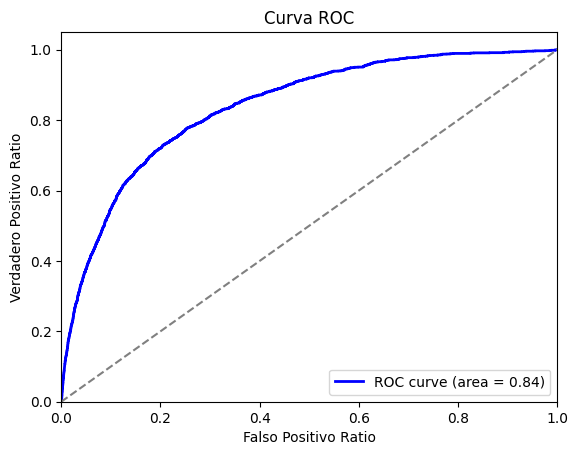

In [106]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_true = yv[tgt]
y_scores = modelo_fraude.predict_proba(Xv[varw])[:,1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Graficar
plt.figure()
plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Falso Positivo Ratio")
plt.ylabel("Verdadero Positivo Ratio")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [107]:
def metricas(model,Xv,yv):
    print(" Métricas para modelo de clasificación: \n")

    print(" Valor ROC : %.3f"   %roc_auc_score( y_score=model.predict_proba(Xv)[:,1] , y_true=yv  )   )

    print(" Valor ACC : %.3f\n" %accuracy_score( y_pred=model.predict(Xv) , y_true=yv) )

    print(" Matriz de confusión: ", "\n", confusion_matrix(y_pred=model.predict(Xv) , y_true=yv ) )

In [108]:
metricas(modelo_fraude , Xv[varw], yv[tgt])

 Métricas para modelo de clasificación: 

 Valor ROC : 0.838
 Valor ACC : 0.994

 Matriz de confusión:  
 [[322263      0]
 [  1906      0]]


In [109]:
df.head()

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour_str,week_day,day,month,year,week_day_2,age,franja_hr,count,n_cc_num,n_merchant,n_category,n_first,n_last,n_gender,n_street,n_city,n_state,n_zip,n_job,n_trans_num,n_hour_str,n_day,n_week_day_2,n_franja_hr,d_amt_2,d_amt_3,d_amt_4,d_amt_5,d_lat_2,d_lat_3,d_lat_4,d_lat_5,d_long_2,d_long_3,d_long_4,d_long_5,d_city_pop_2,d_city_pop_3,d_city_pop_4,d_city_pop_5,d_unix_time_2,d_unix_time_3,d_unix_time_4,d_unix_time_5,d_merch_lat_2,d_merch_lat_3,d_merch_lat_4,d_merch_lat_5,d_merch_long_2,d_merch_long_3,d_merch_long_4,d_merch_long_5,d_week_day_2,d_week_day_3,d_week_day_4,d_week_day_5,d_age_2,d_age_3,d_age_4,d_age_5,d_count_2,d_count_3,d_count_4,d_count_5
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.9700,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.0113,-82.0483,0,00,1,1,1,2019,M,30,madrugada,0,CAT_PEQUE,CAT_PEQUE,misc_net,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada,"(0.999, 47.52]","(0.999, 20.98]","(0.999, 9.65]","(0.999, 7.75]","(20.026, 39.354]","(20.026, 36.499]","(34.62, 39.354]","(33.906, 38.235]","(-87.477, -67.95]","(-82.136, -67.95]","(-87.477, -80.158]","(-84.148, -78.803]","(2456.0, 2906700.0]","(1178.0, 6841.0]","(2456.0, 20328.0]","(1631.0, 4680.0]","(1325376017.999, 1349249747.0]","(1325376017.999, 1342136943.667]","(1325376017.999, 1338750742.5]","(1325376017.999, 1336556658.8]","(19.026999999999997, 39.366]","(19.026999999999997, 36.599]","(34.734, 39.366]","(33.821, 38.056]","(-87.438, -66.951]","(-82.225, -66.951]","(-87.438, -80.237]","(-84.115, -78.824]","(-0.001, 3.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(12.999, 44.0]","(12.999, 35.0]","(12.999, 32.0]","(12.999, 30.0]","(-0.001, 777.0]","(-0.001, 475.0]","(-0.001, 356.0]","(-0.001, 284.0]"
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.2300,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.1590,-118.1865,0,00,1,1,1,2019,M,40,madrugada,0,CAT_PEQUE,CAT_PEQUE,grocery_pos,CAT_PEQUE,CAT_PEQUE,F,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada,"(47.52, 28948.9]","(70.54, 28948.9]","(83.14, 28948.9]","(94.68, 28948.9]","(39.354, 66.693]","(41.044, 66.693]","(41.94, 66.693]","(42.685, 66.693]","(-165.673, -87.477]","(-165.673, -93.828]","(-165.673, -96.798]","(-165.673, -98.739]","(22.999, 2456.0]","(22.999, 1178.0]","(22.999, 743.0]","(22.999, 566.0]","(1325376017.999, 1349249747.0]","(1325376017.999, 1342136943.667]","(1325376017.999, 1338750742.5]","(1325376017.999, 1336556658.8]","(39.366, 67.51]","(41.056, 67.51]","(41.957, 67.51]","(42.65, 67.51]","(-166.672, -87.438]","(-166.672, -93.805]","(-166.672, -96.897]","(-166.672, -98.84]","(-0.001, 3.0]","(-0.001, 2.0]","(-0.001, 1.0]","(-0.001, 1.0]","(12.999, 44.0]","(35.0, 51.0]","(32.0, 44.0]","(39.0, 47.0]","(-0.001, 777.0]","(-0.001, 475.0]","(-0.001, 356.0]","(-0.001, 284.0]"
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.1100,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.1507,-112.1545,0,00,1,1,1,2019,M,57,madrugada,0,CAT_PEQUE,CAT_PEQUE,entertainment,CAT_PEQUE,CAT_PEQUE,M,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,CAT_PEQUE,00,1,M,madrugada,"(47.52, 28948.9]","(70.54, 28948.9]","(83.14, 28948.9]","(94.68, 28948.9]","(39.354, 66.693]","(41.044, 66.693]","(41.94, 66.693]","(40.497, 42.685]","(-165.673, -87.477]","(-165.673, -93.828]","(-165.673, -96.798]","(-165.673, -98.7

In [110]:
Xv[varw].head()

,w_n_franja_hr,w_n_category,w_d_count_5,w_d_age_5,w_d_unix_time_5,w_n_day,w_n_week_day_2,w_d_week_day_5,w_n_gender
1208784,-0.5850,0.9848,0.5230,-0.2308,-0.0113,-0.2777,-0.0006,0.1219,0.1024
15839,1.6325,-0.9462,-0.6748,-0.2124,-0.3032,-0.0245,-0.1757,-0.1966,0.1024
238662,1.5923,0.6675,-0.1413,0.3024,-0.3032,-0.1031,0.2076,0.1219,-0.1115
350400,-0.5850,1.3388,-0.6748,-0.2308,0.2844,-0.0214,-0.1757,-0.1966,-0.1115
1141855,-0.5850,1.3094,0.7225,0.2943,-0.0113,-0.4473,0.2076,0.1219,-0.1115


In [111]:
Xv.head()

,index,n_franja_hr,n_category,d_count_5,d_age_5,d_unix_time_5,n_day,n_week_day_2,d_week_day_5,n_gender,w_n_franja_hr,w_n_category,w_d_count_5,w_d_age_5,w_d_unix_time_5,w_n_day,w_n_week_day_2,w_d_week_day_5,w_n_gender
1208784,1208784,noche,kids_pets,"(965.0, 1476.0]","(60.0, 95.0]","(1362554134.2, 1371816817.0]",19,M,"(-0.001, 1.0]",F,-0.5850,0.9848,0.5230,-0.2308,-0.0113,-0.2777,-0.0006,0.1219,0.1024
15839,15839,mañana,misc_net,"(-0.001, 284.0]","(47.0, 60.0]","(1325376017.999, 1336556658.8]",10,J,"(2.0, 4.0]",F,1.6325,-0.9462,-0.6748,-0.2124,-0.3032,-0.0245,-0.1757,-0.1966,0.1024
238662,238662,tarde,travel,"(284.0, 588.0]","(39.0, 47.0]","(1325376017.999, 1336556658.8]",29,L,"(-0.001, 1.0]",M,1.5923,0.6675,-0.1413,0.3024,-0.3032,-0.1031,0.2076,0.1219,-0.1115
350400,350400,noche,food_dining,"(-0.001, 284.0]","(60.0, 95.0]","(1336556658.8, 1344732593.2]",13,J,"(2.0, 4.0]",M,-0.5850,1.3388,-0.6748,-0.2308,0.2844,-0.0214,-0.1757,-0.1966,-0.1115
1141855,1141855,noche,home,"(1476.0, 3122.0]","(30.0, 39.0]","(1362554134.2, 1371816817.0]",20,L,"(-0.001, 1.0]",M,-0.5850,1.3094,0.7225,0.2943,-0.0113,-0.4473,0.2076,0.1219,-0.1115


In [112]:
Xt.to_parquet("resultados/Xt_fraud.parquet")
Xv.to_parquet("resultados/Xv_fraud.parquet")
yt.to_parquet("resultados/yt_fraud.parquet")
yv.to_parquet("resultados/yv_fraud.parquet")

## Transformación a Scoring (targeta de puntos)

In [159]:
PDO = 40
base_score = 500
base_odds = 2

factor = PDO / np.log(2)

offset = base_score - factor * np.log( base_odds)

print(f"Factor: {factor}, Offset: {offset}")

betas = modelo_fraude.coef_[0].tolist()
beta0 = modelo_fraude.intercept_[0]

n = len(betas)

Factor: 57.70780163555854, Offset: 460.0


### Creación de puntos

In [160]:
for v, beta in zip(varw, betas):

    print(f"Variable: {v}, con beta: {beta}")

    Xt[f'pts_{v}'] = np.ceil(  ( -Xt[v] * beta+beta0 / n  ) * factor + offset / n )
    Xv[f'pts_{v}'] = np.ceil(  ( -Xv[v] * beta+beta0 / n  ) * factor + offset / n )

Variable: w_n_franja_hr, con beta: -1.0264881589200539
Variable: w_n_category, con beta: -1.0131724836259568
Variable: w_d_count_5, con beta: -1.0009519874152562
Variable: w_d_age_5, con beta: -0.8227730677428877
Variable: w_d_unix_time_5, con beta: 0.15675440633905072
Variable: w_n_day, con beta: -0.8963146942754963
Variable: w_n_week_day_2, con beta: -0.5515045062410514
Variable: w_d_week_day_5, con beta: -0.4502750800677139
Variable: w_n_gender, con beta: -0.28976155109483354


In [161]:
varp = Xt.filter(like='pts').columns.tolist()

In [162]:
varp

['pts_w_n_franja_hr',
 'pts_w_n_category',
 'pts_w_d_count_5',
 'pts_w_d_age_5',
 'pts_w_d_unix_time_5',
 'pts_w_n_day',
 'pts_w_n_week_day_2',
 'pts_w_d_week_day_5',
 'pts_w_n_gender']

In [163]:
Xt['score'] = Xt[varp].sum(axis=1)
Xv['score'] = Xv[varp].sum(axis=1)

### Scorecard

In [164]:
lst = []

for vi, vp in zip( [v[2:] for v in varw] , varp):
    print(vi , " ----- " , vp)

    aux = Xt[[vi,vp]].drop_duplicates()
    aux = aux.sort_values( by = vi , ascending = True ).reset_index(drop=True)
    aux.columns = ['atributo','puntos']
    aux['característica'] = vi
    lst.append(aux)

n_franja_hr  -----  pts_w_n_franja_hr
n_category  -----  pts_w_n_category
d_count_5  -----  pts_w_d_count_5
d_age_5  -----  pts_w_d_age_5
d_unix_time_5  -----  pts_w_d_unix_time_5
n_day  -----  pts_w_n_day
n_week_day_2  -----  pts_w_n_week_day_2
d_week_day_5  -----  pts_w_d_week_day_5
n_gender  -----  pts_w_n_gender


In [165]:
scorecard = pd.concat(lst,ignore_index=True)

In [166]:
pd.set_option("display.max_rows",200)

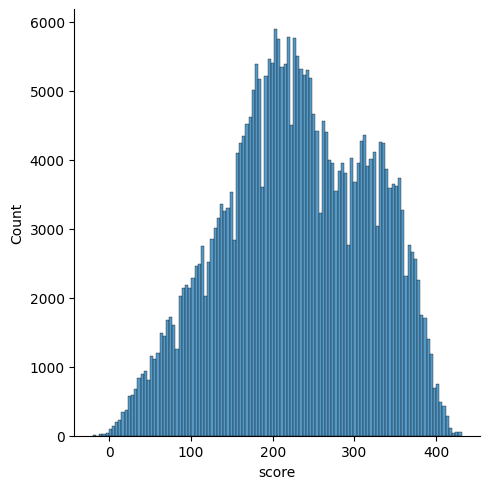

In [167]:
sns.displot(Xv['score'])

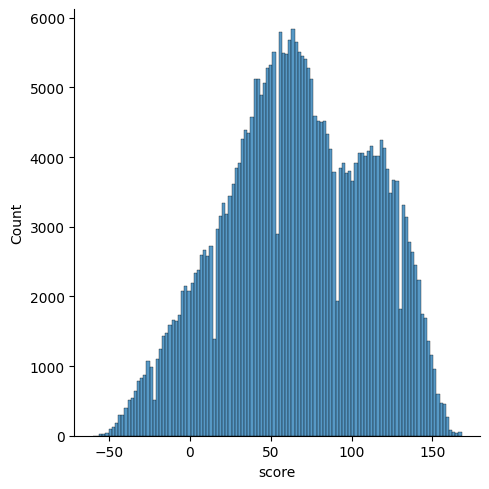

In [158]:
sns.displot(Xv['score'])

In [168]:
scorecard[['característica','atributo','puntos']].sort_values(['característica','atributo']).reset_index(drop=True)

,característica,atributo,puntos
0,d_age_5,"(12.999, 30.0]",18.0000
1,d_age_5,"(30.0, 39.0]",32.0000
2,d_age_5,"(39.0, 47.0]",33.0000
3,d_age_5,"(47.0, 60.0]",8.0000
4,d_age_5,"(60.0, 95.0]",8.0000
5,d_count_5,"(-0.001, 284.0]",-20.0000
6,d_count_5,"(1476.0, 3122.0]",60.0000
7,d_count_5,"(284.0, 588.0]",10.0000
8,d_count_5,"(588.0, 965.0]",30.0000
9,d_count_5,"(965.0, 1476.0]",49.0000


In [121]:
mapa_woe

[('n_franja_hr',
  {'madrugada': -0.5923536615568867,
   'mañana': 1.6325276516056437,
   'noche': -0.5849638351162791,
   'tarde': 1.5923363460391515}),
 ('n_category',
  {'entertainment': 0.866874283446278,
   'food_dining': 1.3387612449783488,
   'gas_transport': 0.20284455619176667,
   'grocery_net': 0.6161309921551295,
   'grocery_pos': -0.9047088170548091,
   'health_fitness': 1.3134716633244579,
   'home': 1.3094170888376206,
   'kids_pets': 0.9848214251833778,
   'misc_net': -0.9462144960365017,
   'misc_pos': 0.5875534770525052,
   'personal_care': 0.9558504337351217,
   'shopping_net': -1.1107511850783074,
   'shopping_pos': -0.20847377352384838,
   'travel': 0.6674615622143241}),
 ('d_count_5',
  {'(-0.001, 284.0]': -0.6748276773523002,
   '(1476.0, 3122.0]': 0.7224996305826573,
   '(284.0, 588.0]': -0.1412533746799385,
   '(588.0, 965.0]': 0.20780142145523417,
   '(965.0, 1476.0]': 0.5230163977161273}),
 ('d_age_5',
  {'(12.999, 30.0]': -0.01853685044895754,
   '(30.0, 39.0

In [119]:
Xv[um+varw]

,index,w_n_franja_hr,w_n_category,w_d_count_5,w_d_age_5,w_d_unix_time_5,w_n_day,w_n_week_day_2,w_d_week_day_5,w_n_gender
1208784,1208784,-0.5850,0.9848,0.5230,-0.2308,-0.0113,-0.2777,-0.0006,0.1219,0.1024
15839,15839,1.6325,-0.9462,-0.6748,-0.2124,-0.3032,-0.0245,-0.1757,-0.1966,0.1024
238662,238662,1.5923,0.6675,-0.1413,0.3024,-0.3032,-0.1031,0.2076,0.1219,-0.1115
350400,350400,-0.5850,1.3388,-0.6748,-0.2308,0.2844,-0.0214,-0.1757,-0.1966,-0.1115
1141855,1141855,-0.5850,1.3094,0.7225,0.2943,-0.0113,-0.4473,0.2076,0.1219,-0.1115
...,...,...,...,...,...,...,...,...,...,...
725580,725580,-0.5850,-1.1108,0.7225,0.2943,0.0404,0.3025,-0.0006,0.1219,0.1024
1279727,1279727,1.6325,0.2028,-0.1413,0.3024,-0.0113,0.1516,0.2076,0.1219,-0.1115
1227083,1227083,-0.5924,0.2028,0.7225,-0.0185,-0.0113,0.1632,-0.1070,-0.1070,0.1024
326717,326717,-0.5850,1.3094,0.2078,0.3024,0.2844,0.0873,-0.0006,0.1219,0.1024


In [120]:
yv

,index,is_fraud
1208784,1208784,0
15839,15839,0
238662,238662,0
350400,350400,0
1141855,1141855,0
...,...,...
725580,725580,0
1279727,1279727,0
1227083,1227083,0
326717,326717,0
